#**Stock Price Prediction by LSTM (Regression)**
**Abdallah Fekry Mohammed**

**NTI**


In [ ]:
import pandas as pd
df = pd.read_csv('/content/AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.779285,19.821428,19.343929,19.608213,16.890799,560518000
1,2013-01-03,19.567142,19.631071,19.321428,19.360714,16.677595,352965200
2,2013-01-04,19.177500,19.236786,18.779642,18.821428,16.213049,594333600
3,2013-01-07,18.642857,18.903570,18.400000,18.710714,16.117680,484156400
4,2013-01-08,18.900356,18.996071,18.616072,18.761070,16.161058,458707200


In [ ]:
d = df.iloc[:,1:2]
d.head()

,Open
0,19.779285
1,19.567142
2,19.177500
3,18.642857
4,18.900356


In [ ]:
d.shape

(1259, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()  #you must pass to MinMaxScaler function a 2D input
d=scalar.fit_transform(d)
d

array([[0.19795893],
       [0.19086893],
       [0.17784675],
       ...,
       [0.95814044],
       [0.96566006],
       [0.96164959]])

In [ ]:
len(d)

1259

In [ ]:
train = d[:818]
test = d[818:]
print("train shape:",train.shape,"\ntest shape:",test.shape)

train shape: (818, 1) 
test shape: (441, 1)


In [ ]:
print("train length:",len(train),"\ntest length:",len(test))

train length: 818 
test length: 441


In [ ]:
import numpy as np
def createDS(ds, ts=60):
  x = []
  y = []
  for i in range(len(ds) - ts):
    a = ds[i:(i + ts)]
    x.append(a)
    b = ds[(i + ts)]
    y.append(b)
  return np.array(x), np.array(y)

In [ ]:
x_train, y_train = createDS(train,60)
x_test, y_test = createDS(test,60)
print(x_train.shape,y_train.shape, x_test.shape,y_test.shape,sep='\n')

(758, 60, 1)
(758, 1)
(381, 60, 1)
(381, 1)


In [ ]:
import numpy as np
np.where(x_train==y_train[0])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60]),
 array([59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43,
        42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26,
        25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,
         8,  7,  6,  5,  4,  3,  2,  1,  0]))

In [ ]:
y_train[0]

15.782143

In [ ]:
x_train[1][-1]

15.782143

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_train.shape

(758, 60, 1)

In [ ]:
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
x_test.shape

(381, 60, 1)

In [ ]:
from keras.models import Sequential
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(60,1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train,y_train,epochs=100, verbose=1, validation_data=[x_test,y_test])

Epoch 1/100
24/24 [==============================] - 12s 181ms/step - loss: 0.0232 - val_loss: 0.0041
Epoch 2/100
24/24 [==============================] - 2s 95ms/step - loss: 0.0022 - val_loss: 0.0064
Epoch 3/100
24/24 [==============================] - 2s 94ms/step - loss: 0.0013 - val_loss: 0.0034
Epoch 4/100
24/24 [==============================] - 2s 98ms/step - loss: 0.0012 - val_loss: 0.0066
Epoch 5/100
24/24 [==============================] - 3s 138ms/step - loss: 0.0012 - val_loss: 0.0051
Epoch 6/100
24/24 [==============================] - 2s 94ms/step - loss: 0.0012 - val_loss: 0.0044
Epoch 7/100
24/24 [==============================] - 2s 100ms/step - loss: 0.0012 - val_loss: 0.0080
Epoch 8/100
24/24 [==============================] - 2s 94ms/step - loss: 0.0011 - val_loss: 0.0039
Epoch 9/100
24/24 [==============================] - 2s 93ms/step - loss: 0.0011 - val_loss: 0.0033
Epoch 10/100
24/24 [==============================] - 3s 146ms/step - loss: 9.9481e-04 - val_los

In [ ]:
yp = model.predict(x_test)
yp.shape

12/12 [==============================] - 2s 24ms/step


(381, 1)

In [ ]:
yp_train = model.predict(x_train)
yp_train.shape

24/24 [==============================] - 1s 25ms/step


(758, 1)

In [ ]:
y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

In [ ]:
yp_train=scalar.inverse_transform(yp_train)
yp=scalar.inverse_transform(yp)

y_train=scalar.inverse_transform(y_train)  #to make inverse transform
y_test=scalar.inverse_transform(y_test)

In [ ]:
print(y_train.shape,"\n",y_test.shape)

(758, 1) 
 (381, 1)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
loss_train = mean_squared_error(yp_train,y_train)
loss_test = mean_squared_error(yp,y_test)
print("MSE for Train set:",loss_train,"\nMSE for Test set:",loss_test)

MSE for Train set: 0.3741402895630769 
MSE for Test set: 0.28738108208359


In [ ]:
x_test[25].shape

(60, 1)

In [ ]:
yp1 = model.predict(x_test[25].reshape(1,60,1))
yp1

1/1 [==============================] - 0s 32ms/step


array([[0.4327192]], dtype=float32)

In [ ]:
yp1=scalar.inverse_transform(yp1)
yp1

array([[26.803648]], dtype=float32)

In [ ]:
y_test[25]

array([26.202499])

#Predict a random value from x_test

-> run these cell everytime will predict a random value from x_test <-

In [ ]:
import random as r
# where n is a random index in y_test
n = r.randint(0,len(x_test))
yp1 = model.predict(x_test[n].reshape(1,60,1))
print("at index '{}' in x_test \nPredicted value = {} \nActual value    = {}".format(n, yp1[0,0] ,y_test[n,0]))

1/1 [==============================] - 0s 21ms/step
at index '337' in x_test 
Predicted value = 33.651756286621094 
Actual value    = 39.822498


#Visualization

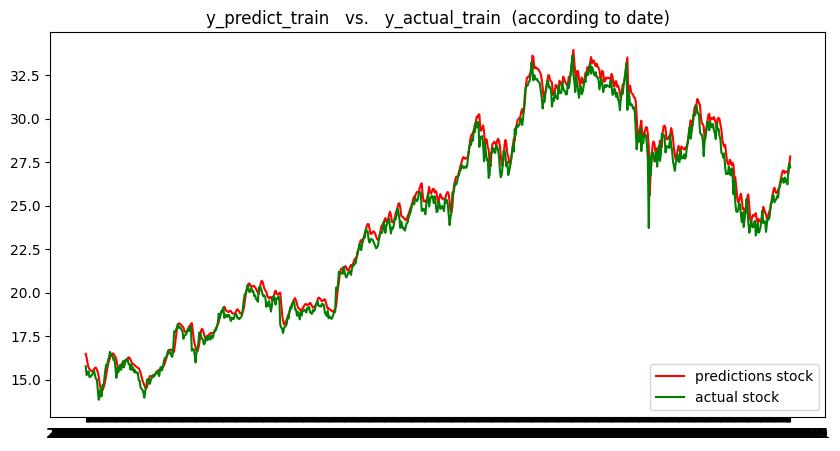

In [ ]:
import matplotlib.pyplot as plt
split = 818
time_step = 60
plt.figure(figsize=(10,5))
plt.title('y_predict_train   vs.   y_actual_train  (according to date)')
plt.plot(df.loc[time_step:split-1,'Date'],yp_train, color='r', label='predictions stock')
plt.plot(df.loc[time_step:split-1,'Date'],y_train, color='green', label='actual stock')
plt.legend(loc='lower right')
plt.show()

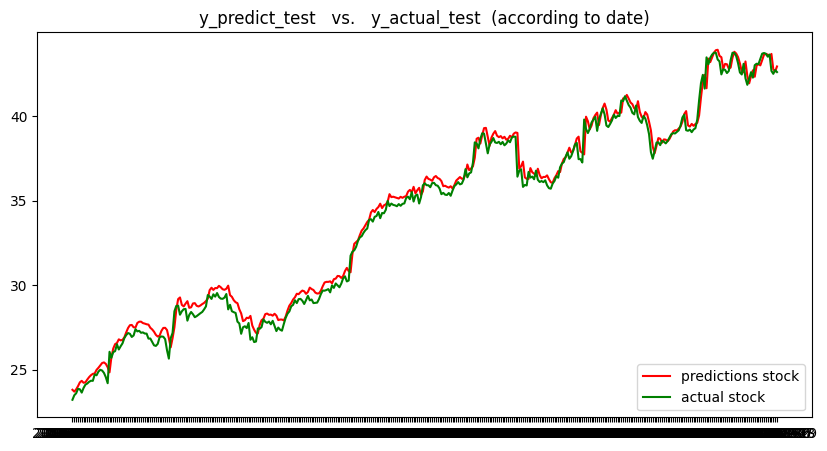

In [ ]:
plt.figure(figsize=(10,5))
plt.title('y_predict_test   vs.   y_actual_test  (according to date)')
plt.plot(df.loc[split+time_step:,'Date'],yp, color='r', label='predictions stock')
plt.plot(df.loc[split+time_step:,'Date'],y_test, color='green', label='actual stock')
plt.legend(loc='lower right')
plt.show()